# **Dataset from google Drive**

In [1]:
batch_size = 32
img_height = 50# en 400 pix el dataset de rayos x me colapsa por la ram
img_width = 50
color_type=3

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive



Mounted at /gdrive
/gdrive


# **Setup**



---



---



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import os
from PIL import Image
import tensorflow as tf
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, BatchNormalization, SimpleRNN, Flatten, LSTM
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt
! pip install utils
import torch,time,os, shutil
#import models
import utils
import pandas as pd
import numpy as np
import torch, time, os, shutil
#import models, utils
import numpy as np
import pandas as pd
import torch
#from tensorboard_logger import Logger
from torch import nn, optim
from torch.utils.data import DataLoader
import tensorflow as tf
from torch import nn, optim
from torch.utils.data import DataLoader
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
!pip install git+https://github.com/Kaggle/learntools.git
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Setup feedback system



from learntools.core import binder
binder.bind(globals())
from learntools.computer_vision.ex5 import *

# Imports
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import collections.abc
import functools
from typing import Any, Callable, Iterable, Iterator, Union

import numpy as np

import tensorflow as tf
from tensorflow_datasets.core import tf_compat
from tensorflow_datasets.core import utils
from tensorflow_datasets.core.utils import type_utils
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-d217bfoh
  Running command git clone --filter=blob:none --quiet https://github.com/Kaggle/learntools.git /tmp/pip-req-build-d217bfoh
  Resolved https://github.com/Kaggle/learntools.git to commit dd9a7f6495abbba9c7987c16365c8785fb646125
  Preparing metadata (setup.py) ... done
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=268931 sha256=989e9da298f80247e8a74a37f4c0dc4f3c92dcd54976811c3c0aad06ede718e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-nlt6kx5y/wheels/78/34/a5/715b4d06ed3d8190d1bf8a446d6dc3864610b4b0b207d38275
Successfully built learntools


In [4]:
print(tf.__version__)
a=tf.__version__

2.11.0


In [5]:
print(a)

2.11.0


In [6]:

# if a==("2.7.0") :
#   print("ok")
# else:
#     !pip uninstall tensorflow -y
#     !pip install tensorflow==2.7

!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00
time: 1.02 ms (started: 2023-03-03 11:29:09 +00:00)


# Load the zip dataset

In [ ]:
!unzip -o '/gdrive/MyDrive/Datasets/Dataset_histology.zip' -d '/content/original_dataset'
#path to 270k images
#data_dir ='' #path to 6k images
#data_dir ='/gdrive/Othercomputers/Mi PC/Dataset_histology' #path to 270k images


# **Read one image of the dataset**

In [ ]:
import cv2

im = cv2.imread('/content/original_dataset/BC_IDC_Grade_1/40x/01_BC_G1_9057_40x_1.JPG')

print(type(im))


print(im.shape)
print(type(im.shape))


<class 'numpy.ndarray'>
(3024, 4032, 3)
<class 'tuple'>
time: 1.31 s (started: 2023-03-03 04:26:35 +00:00)


In [8]:

data_dir ='/content/original_dataset'
data_dir = pathlib.Path(data_dir)
directory = data_dir

time: 1.75 ms (started: 2023-03-03 11:31:29 +00:00)


In [9]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

277524
time: 3.48 s (started: 2023-03-03 11:31:29 +00:00)


# Separate into training validation and testing

In [10]:
import os
import shutil

# Define the path to your original dataset directory
original_data_dir = '/content/original_dataset'

# Define the path to your new dataset directory
new_data_dir = '/content/divided_dataset'

# Define the subdirectories for the train, validation, and test sets
train_dir = os.path.join(new_data_dir, 'train')
validation_dir = os.path.join(new_data_dir, 'validation')
test_dir = os.path.join(new_data_dir, 'test')

# Create the subdirectories if they don't already exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the percentage of images to use for each set
train_pct = 0.08
validation_pct = 0.005
test_pct = 0.005

# Define the class names
#class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'] uncoment to use 4 classes
class_names = ['0', '1']# f9r carcinoma

# Loop through the class folders and move images into the appropriate subdirectory
for class_name in class_names:
    class_dir = os.path.join(original_data_dir, class_name)
    filenames = os.listdir(class_dir)
    n = len(filenames)
    train_end = int(train_pct * n)
    validation_end = int((train_pct + validation_pct) * n)
    train_filenames = filenames[:train_end]
    validation_filenames = filenames[train_end:validation_end]
    test_filenames = filenames[validation_end:]
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, class_name, filename)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)
    for filename in validation_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(validation_dir, class_name, filename)
        os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, class_name, filename)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)


time: 3min 7s (started: 2023-03-03 11:31:33 +00:00)


To do this, you can create three different subdirectories within your dataset directory and move a portion of the images into each subdirectory. For example, you might use 70% of the images for training, 15% for validation, and 15% for testing. You can adjust these percentages as needed for your specific use case.

## Load functions
Import TensorFlow and other necessary libraries:

In [11]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

time: 9.59 ms (started: 2023-03-03 11:34:41 +00:00)


In [12]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))#8,6
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

time: 9.2 ms (started: 2023-03-03 11:34:41 +00:00)




---



---





---



---



# Define the subdirectories for the train, validation, and test sets

In [ ]:



# Define the subdirectories for the train, validation, and test sets
train_dir = "/content/divided_dataset2/train"
validation_dir = "/content/divided_dataset2/validation"
test_dir = "/content/divided_dataset/test"

time: 941 µs (started: 2023-03-03 05:08:18 +00:00)


In [ ]:
train_dir

'/content/divided_dataset2/train'

time: 3.64 ms (started: 2023-03-03 05:07:20 +00:00)


In [ ]:
# Create the train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
     #color_mode="grayscale",
    #label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    #validation_split=0.2,
    #subset='training',
    seed=123
   
   
)


Found 22201 files belonging to 2 classes.
time: 1.75 s (started: 2023-03-03 05:07:21 +00:00)


In [ ]:
# Create the validation dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    #validation_split=0.2,
    #subset='validation',
    seed=123
)

Found 1387 files belonging to 2 classes.
time: 159 ms (started: 2023-03-03 05:07:29 +00:00)


In [ ]:
# Create the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

Found 180391 files belonging to 2 classes.
time: 13.2 s (started: 2023-03-03 05:08:21 +00:00)


In this example, the image_dataset_from_directory function is used to create three datasets: train_ds, validation_ds, and test_ds. The train_ds and validation_ds datasets are created from the train_dir directory, with 80% of the data used for training and 20% used for validation. The test_ds dataset is created from the test_dir directory.

Note that the seed parameter is used to ensure that the same random split is used for the train and validation datasets each time the code is run. This can be important for reproducibility.



---



---

\::

In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1']
time: 2.49 ms (started: 2023-03-03 05:08:48 +00:00)


In [ ]:
my_list = os.listdir(data_dir)
print(my_list)

['0', '1']
time: 1.42 ms (started: 2023-03-03 05:08:49 +00:00)


## cHECK THE CONVERSION OF TRAIN_DS

Here are the first nine images from the training dataset:

You will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32,)
time: 739 ms (started: 2023-03-03 05:08:50 +00:00)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

time: 10.4 ms (started: 2023-03-03 05:08:53 +00:00)




---



---



# **Yoo can jump from here and load the pretrained model**
# **-----------------------------------------------------------------------**

## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [ ]:
normalization_layer = layers.Rescaling(1./255)

time: 1.92 ms (started: 2023-03-03 05:08:56 +00:00)


There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

# **Suele saturar la memoria ram**

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))# aguanto los 200 pixeles en el dataset xyar 21k
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.18823531 0.9725491
time: 12.1 s (started: 2023-03-03 05:08:58 +00:00)


Or, you can include the layer inside your model definition, which can simplify deployment. Use the second approach here.

Note: You previously resized images using the `image_size` argument of `tf.keras.utils.image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the `tf.keras.layers.Resizing` layer.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside your model like other layers, and run on the GPU.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  color_type)),# 3 for color, 1 for gray
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

time: 1.34 s (started: 2023-03-03 05:09:10 +00:00)


Visualize a few augmented examples by applying data augmentation to the same image several times:

In [ ]:

 plt.figure(figsize=(10, 10))
 for images, _ in train_ds.take(1):
   for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

time: 580 µs (started: 2023-03-03 04:53:38 +00:00)


You will add data augmentation to your model before training in the next step.

## See number of classes

(https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} regularization to the network.



In [ ]:
num_classes = len(class_names)

time: 537 µs (started: 2023-03-03 05:09:11 +00:00)


In [ ]:
print(num_classes)

2
time: 860 µs (started: 2023-03-03 05:09:11 +00:00)


# **Model extra libraries**

In [ ]:
tf.compat.v1.keras.applications.ResNet50 
tf.compat.v1.keras.applications.resnet.ResNet50
tf.compat.v1.keras.applications.resnet50.ResNet50

<function keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, **kwargs)>

time: 7.1 ms (started: 2023-03-03 05:09:11 +00:00)


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


time: 783 µs (started: 2023-03-03 05:09:11 +00:00)


# **load model**

In [ ]:
# # Initialize the Alexnet model.
# model = Sequential()
          
# # 1st Convolutional Layer
# model.add(Conv2D(filters = 96, input_shape = (img_height,img_width,color_type), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
# model.add(Activation('relu'))
# # Batch Normalisation before passing it to the next layer
# model.add(BatchNormalization())
# # Pooling Layer
# model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

# # 2nd Convolutional Layer
# model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
# # Pooling Layer
# model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
# # Dropout
# model.add(Dropout(0.5))

# # 4th Convolutional Layer
# model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
# # Dropout
# model.add(Dropout(0.5))

# # 5th Convolutional Layer
# model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
# model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
# # Pooling Layer
# #model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
# # Dropout
# model.add(Dropout(0.5))

# # Passing it to a dense layer
# model.add(Flatten())

# # 1st Dense Layer
# model.add(Dense(4096, input_shape = (224*224*3,)))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.25))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 2nd Dense Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.5))
# # Batch Normalisation
# model.add(BatchNormalization())

# # 3rd Dense Layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.5))
# # Batch Normalisation
# model.add(BatchNormalization())

# # Output Layer
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# # Get the model summary.
# model.summary()

time: 718 µs (started: 2023-03-02 18:46:33 +00:00)


In [ ]:
model = ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(img_height,img_width,color_type),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
)



time: 1.72 s (started: 2023-03-03 05:09:12 +00:00)


changing the loss='sparse_categorical_crossentropy' solved the dimensioanl problem

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
epochs = 100
stepsperepoch=25
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=6)
#mc = ModelCheckpoint("alexnet.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)
mc = ModelCheckpoint("/gdrive/MyDrive/checkpoints/Resnet50final.h5", monitor = 'accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto') #period = 1)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

last layer has to have 4 parameters-

# **Entrenar el modelo**

In [ ]:
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[annealer,es],
    #steps_per_epoch=stepsperepoch,
    validation_data=val_ds,
    #callbacks=[early_stopping],
)

Epoch 1/100
694/694 [==============================] - 84s 63ms/step - loss: 0.5260 - accuracy: 0.8127 - val_loss: 0.6847 - val_accuracy: 0.7657 - lr: 0.0010
Epoch 2/100
694/694 [==============================] - 40s 58ms/step - loss: 0.4287 - accuracy: 0.8291 - val_loss: 1.1564 - val_accuracy: 0.7419 - lr: 9.5000e-04
Epoch 3/100
694/694 [==============================] - 40s 57ms/step - loss: 0.3997 - accuracy: 0.8322 - val_loss: 0.5205 - val_accuracy: 0.8075 - lr: 9.0250e-04
Epoch 4/100
694/694 [==============================] - 40s 57ms/step - loss: 0.4067 - accuracy: 0.8288 - val_loss: 0.3909 - val_accuracy: 0.8464 - lr: 8.5737e-04
Epoch 5/100
694/694 [==============================] - 40s 57ms/step - loss: 0.3683 - accuracy: 0.8412 - val_loss: 0.5754 - val_accuracy: 0.8255 - lr: 8.1451e-04
Epoch 6/100
694/694 [==============================] - 39s 57ms/step - loss: 0.3599 - accuracy: 0.8471 - val_loss: 20.0185 - val_accuracy: 0.7859 - lr: 7.7378e-04
Epoch 7/100
694/694 [==========

# **Graficas**

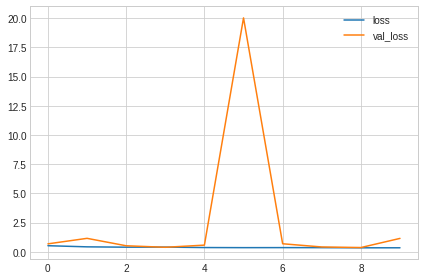

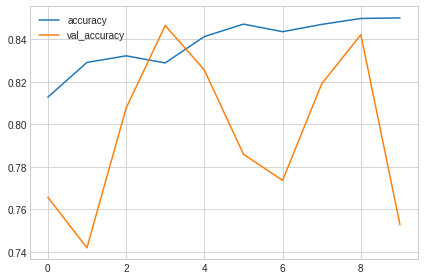

time: 22.4 s (started: 2023-03-03 05:17:28 +00:00)


In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

# **Save the trained model**

In [ ]:

path = "/gdrive/MyDrive/models/Resnet50_Histology_1"

# Check if the path already exists
if os.path.exists(path):
    print(f"Deleting the existing model at {path}")
    # If the path already exists, delete it
    os.system(f"rm -r {path}")

# Create a new directory at the specified path
os.mkdir(path)

# Save the model in SavedModel format to the specified path
model.save(path, save_traces=False)

Deleting the existing model at /gdrive/MyDrive/models/Resnet50_Histology_1


time: 12.3 s (started: 2023-03-03 05:19:26 +00:00)


# **-----------------------------------------------**
# **You can load a previous trained model**

In [ ]:
path = "/gdrive/MyDrive/models/Resnet50_Histology_1"

time: 826 µs (started: 2023-03-03 05:19:53 +00:00)


In [ ]:
#Reload model
new_model = tf.keras.models.load_model(path)

# Check its architecture
new_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

# Accuracy of the model on test dataset



In [ ]:
# Define the path to your test dataset directory
test_dir = '/content/divided_dataset/test'

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Load the trained model
model = new_model

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print('Test accuracy:', accuracy)


Found 180391 files belonging to 2 classes.
5638/5638 [==============================] - 190s 33ms/step - loss: 1.2197 - accuracy: 0.7511
Test accuracy: 0.7510629892349243
time: 3min 21s (started: 2023-03-03 05:21:40 +00:00)


# **Confusion matrix**



---



Found 180391 files belonging to 2 classes.
5638/5638 [==============================] - 120s 21ms/step


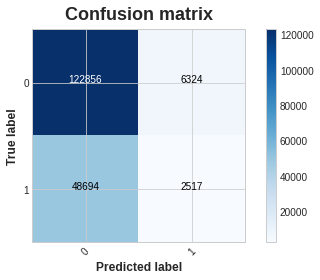

time: 3min 39s (started: 2023-03-03 05:25:10 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Define the path to your test dataset directory
test_dir = '/content/divided_dataset/test'

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Load the trained model
#model = tf.keras.models.load_model('/gdrive/MyDrive/models/Resnet50_Xray21k_3sets')

# Make predictions on the test dataset
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
# Get the true labels from the test dataset
# Get the true labels from the test dataset

y_true = tf.concat([y for x, y in test_dataset], axis=0)

# Get the class names from the test dataset
class_names = test_dataset.class_names

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




---



https://stackoverflow.com/questions/66636157/how-can-i-plot-a-confusion-matrix-for-image-dataset-from-directory

# **Plotted Matrix**

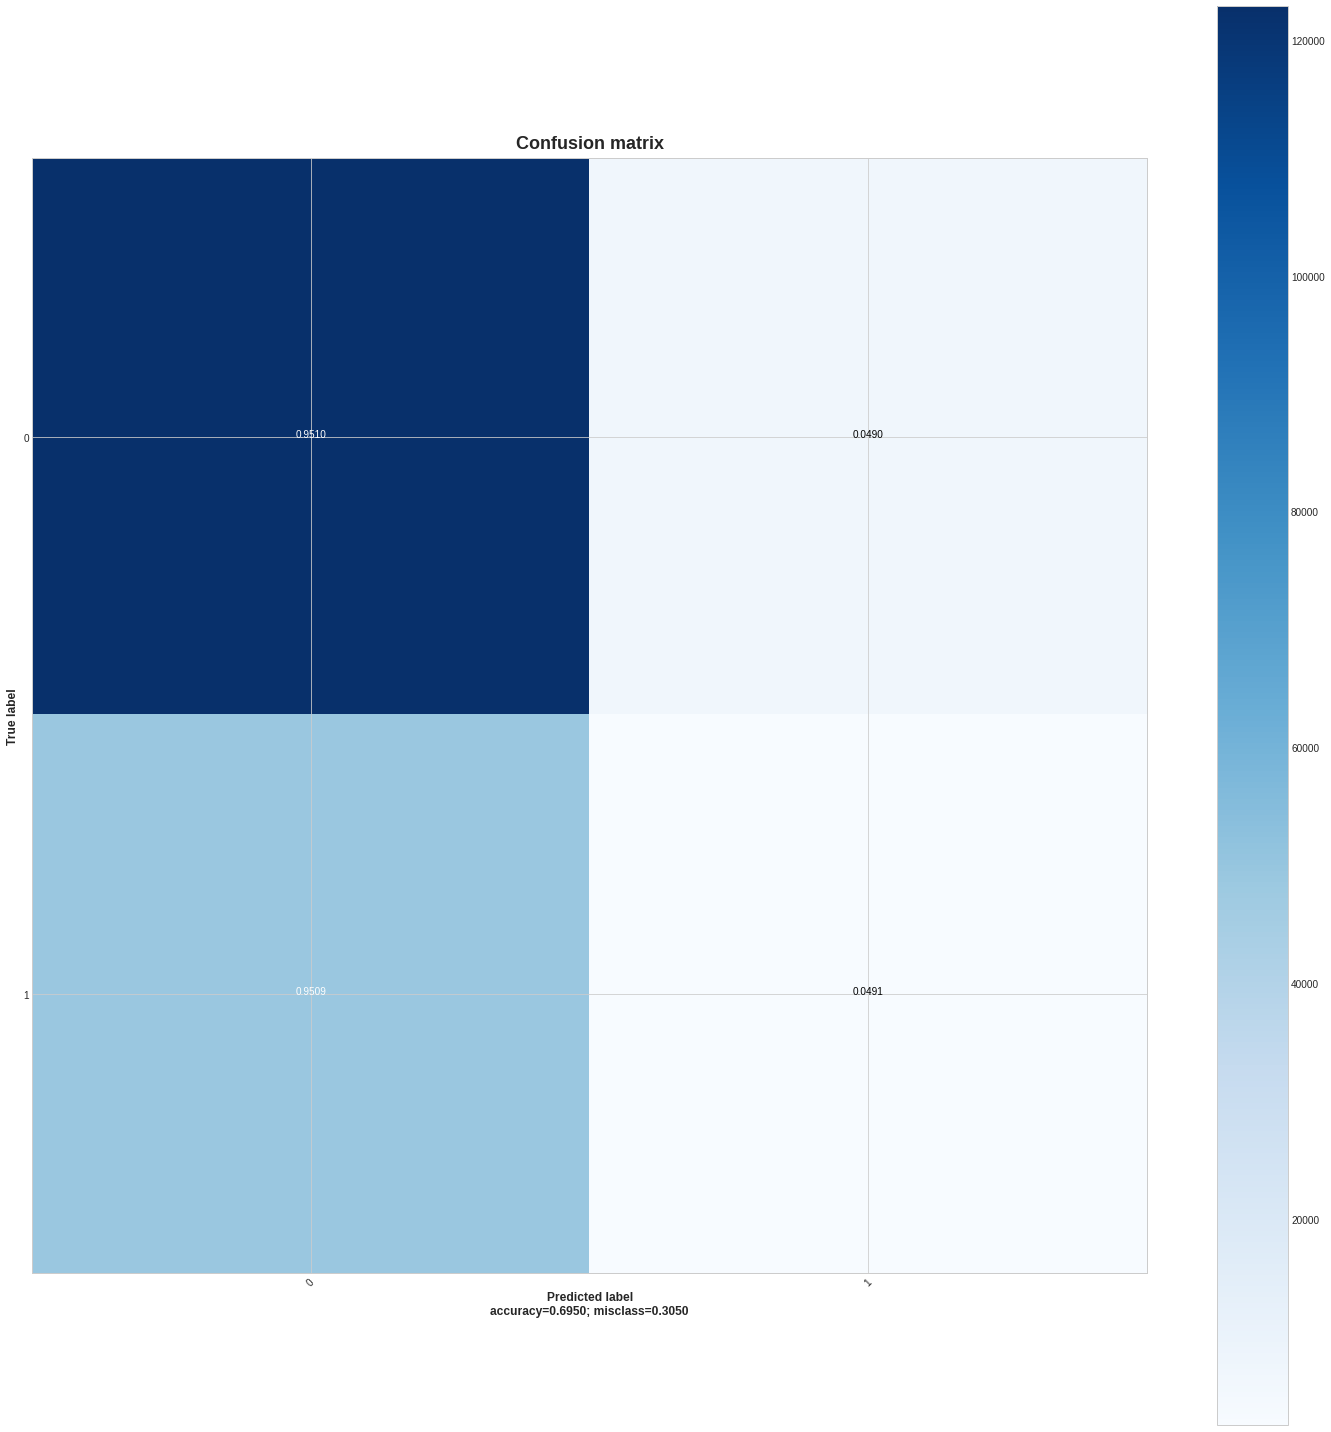

time: 854 ms (started: 2023-03-03 05:28:50 +00:00)


In [ ]:
plot_confusion_matrix(cm,
                          class_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

***Alexnet es muy buena para predecir covid y viral Pneumonia***

In [ ]:
# # Importing the metrics package from sklearn library
# from sklearn import metrics
# # Creating the confusion matrix

# # Assigning columns names
# cm_df = pd.DataFrame(cm, 
#             columns = ['Predicted Negative', 'Predicted Positive'],
#             index = ['Actual Negative', 'Actual Positive'])
# # Showing the confusion matrix
# cm_df

time: 2.27 ms (started: 2023-03-02 20:28:12 +00:00)


# **Confusion Metrics**

In [ ]:
score = new_model.evaluate(test_dataset, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5638/5638 [==============================] - 134s 24ms/step - loss: 1.2197 - accuracy: 0.7511
Test loss: 1.2196623086929321
Test accuracy: 0.7510629892349243
time: 2min 14s (started: 2023-03-03 05:28:51 +00:00)


In [ ]:
confusion_metrics (cm)

True Positives: 2517
True Negatives: 122856
False Positives: 6324
False Negatives: 48694
--------------------------------------------------
Accuracy: 0.7
Mis-Classification: 0.3
Sensitivity: 0.05
Specificity: 0.95
Precision: 0.95
f_1 Score: 0.09
time: 1.2 ms (started: 2023-03-03 05:31:05 +00:00)


# **Plot model**

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 43.9 MB/s eta 0:00:00
time: 5.37 s (started: 2023-03-02 20:28:22 +00:00)


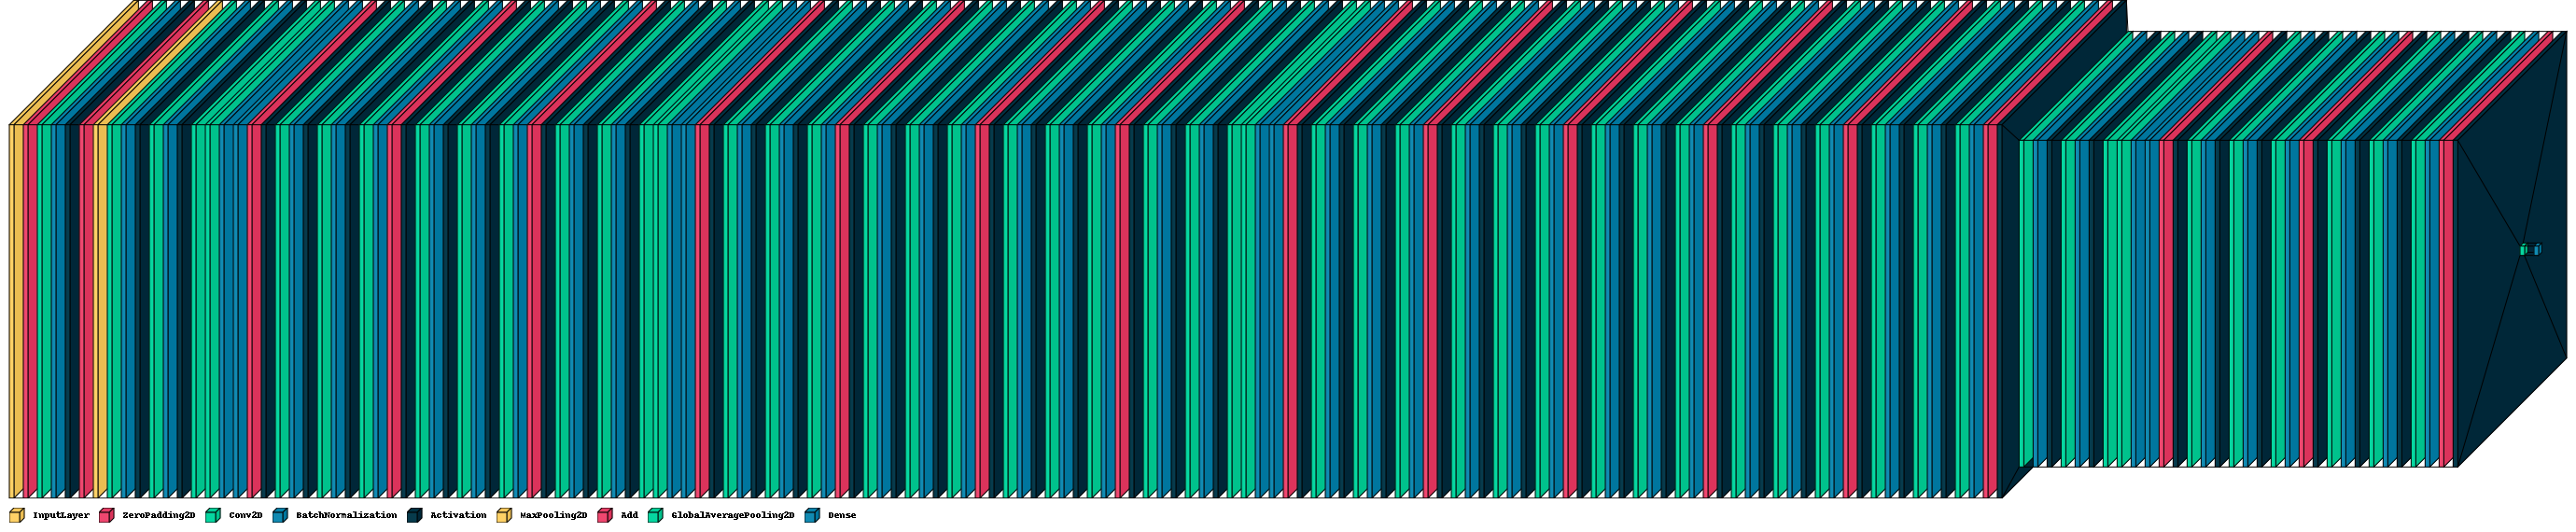

time: 478 ms (started: 2023-03-02 20:28:27 +00:00)


In [ ]:
from PIL import ImageFont
import visualkeras

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(new_model, legend=True,
                         min_xy=10,max_xy=400, min_z=10 , max_z=5 , spacing=10
                         ,scale_xy=50, scale_z=10,
                         to_file='/content/Resnet layers.png') 

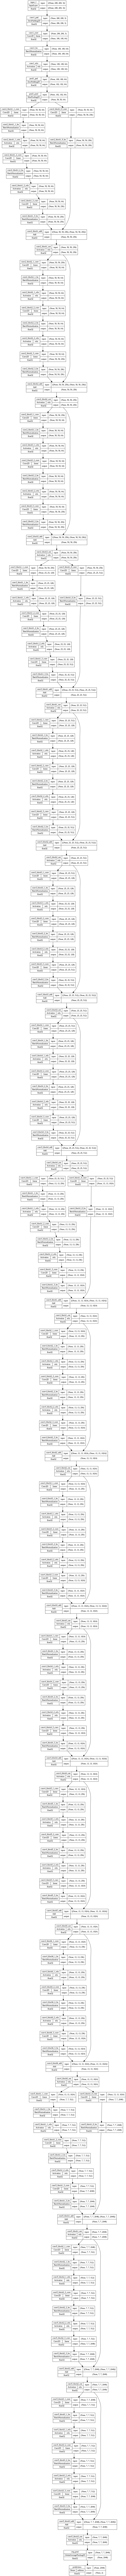

time: 3.96 s (started: 2023-03-02 20:28:28 +00:00)


In [ ]:
tf.keras.utils.plot_model(
    new_model,
    to_file="/content/Resnet detailed.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TR",
    expand_nested=True,
    dpi=90,
    layer_range=None,
    show_layer_activations=True,
)